In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 4 : Algorithmique</center></span>

## B. Algorithmes de base sur les tableaux

### I. Rercherches séquentielles

En **python** un **tableau** peut être représenté par un **n-uplet** ou par une **liste**. Dans les exemples, nous travaillerons plutôt avec des listes car, comme nous l'avons vu, elles sont un peu plus flexibles que les tuples (elles sont mutables). Mais on pourrait aussi le faire avec des tuples. En dehors des exercices pratiques, nous utiliserons le terme générique de tableau.

Dans la feuille d'exercice précédente, nous avons déjà vu des **algorithmes de recherche d'une occurence** (présence d'une valeur) **ou d'un extremum** (maximum ou minimum) dans un tableau.

En voici pour rappel les pseudo-codes :

**Fonction** Recherche_occurence (tab,x)
> *tab est un tableau de n valeurs dans lequel on cherche une occurence de x.*  
> *Si x est présent, on renvoie l'indice de sa première occurence, sinon on renvoie -1.*  
>
> i $\leftarrow$ 0  
> n $\leftarrow$ taille(tab)  
> *# On parcourt le tableau tant qu'on a pas trouvé x et qu'on est pas au bout du tableau.*  
> **Tant que** i < n **et** tab[i] $\ne$ x **faire**   
>> i $\leftarrow$ i + 1  
> 
> *# Si i = n, c'est qu'on a pas trouvé x.*  
> **Si** i = n **alors**
>> i $\leftarrow$ - 1  
>
> *# Sinon i est l'indice de sa première occurence.*  
> **Retourner** i

**Fonction** Recherche_maximum (tab)
> *tab est un tableau de n valeurs numériques dans lequel on cherche la valeur maximale.*  
> *On renvoie le maximum trouvé.*  
>
> *# maxi est la variable dans laquelle on stocke la valeur maximale trouvée au fur et à mesure de la recherche.*  
> *float* : maxi  
> *# Au départ la première valeur du tableau est forcément le maximum trouvé.*  
> maxi $\leftarrow$ tab[0]  
> n $\leftarrow$ taille(tab)  
> *# On parcourt le tableau en comparant chaque nouvelle valeur à maxi. Si elle est plus grande, elle remplace maxi.*  
> **Pour** i allant de 1 à n-1 **faire**   
>> **Si** tab[i] > maxi **alors**
>>> maxi $\leftarrow$ tab[i]  
>
> **Retourner** maxi

**Remarques :**
- Pour rechercher un minimum, il suffit de tester si `tab[i]` est inférieur à la variable `mini`(au lieu de supérieur à `maxi`).
- Cet algorithme de recherche d'une occurence marche avec un tableau de données de n'importe quel type (`int`, `float`, `string`, ...) et est appelé **recherche linéaire** (ou par balayage). En fait, il marche aussi si `tab` est une chaîne de caractères.

Ces algorithmes sont dits **séquentiels** car, à moins qu'une occurence soit trouvée avant, ils **parcourent le tableau du début à la fin, dans l'ordre**.

Comme nous l'avons vu, cela implique que leur **complexité (coût en temps) est linéaire**.

**Exercice :** Ecrire le pseudo-code d'un algorithme de calcul de moyenne.

**Fonction** Calcul_moyenne (tab)
> *tab est un tableau de n valeurs numériques dont on veut calculer la moyenne.*  
> *On renvoie la moyenne calculée.*  
>


**Remarque :** Cet algorithme est **aussi séquentiel** donc son coût est **aussi linéaire**.

### II. Recherche dichotomique

Pour **rechercher un maximum** ou **calculer une moyenne**, on a **pas d'autre choix que de parcourir le tableau en entier**.

Mais ce n'est pas forcément le cas pour la recherche d'une occurence. D'ailleurs, si la valeur est présente, l'algorithme se termine avant d'avoir parcouru tout le tableau.

Est-ce vraiment nécessaire de parcourir tout le tableau pour s'apercevoir que la valeur recherchée ne s'y trouve pas ? Doit-on forcément partir du début du tableau quand la valeur recherchée se trouve à la dernière position du tableau ?

La réponse à ces deux questions est non ...

A condition que le tableau soit déjà trié ! (Ce qui implique bien sûr que le tableau contienne des valeurs numériques.)

Ainsi, un **algorithme de recherche dichotomique** permet de **trouver une valeur dans un tableau déjà trié** bien **plus rapidement que l'algorithme séquentiel** précédent. Autrement dit, sa **complexité sera mieux que linéaire**, en fait nous verrons qu'elle est **logarithmique**.

#### 1. Principe

Le principe d'une **recherche dichotomique** (*binary search* en anglais) est de **couper le tableau en deux parties égales à chaque étape** et de déterminer à l'aide d'un **simple test dans quelle moitié se trouve la valeur recherchée**.

On continue de couper le tableau en deux **jusqu'à ce que sa taille soit égale à 1**. A ce moment là, soit la dernière valeur restante est la bonne, soit c'est qu'elle n'était pas dans le tableau.

**IMPORTANT :** Cela ne peut fonctionner qu'avec un **tableau préalablement trié**.

C'est en réalité un exemple d'une stratégie beaucoup plus générale en informatique, appelée **"diviser pour mieux régner"** (*divide-and-conquer* en anglais).



Pour en voir l'efficacité, il suffit de chercher combien d'itérations, au pire, il nous faudrait pour trouver quelqu'un dans un annuaire comportant les noms des 7 milliards d'habitants de la Terre.

Autrement dit, que vaut $k$ pour que $\frac{7\cdot 10^9}{2^k}<1$ ?

La réponse est $k = 33$ car $2^{33}=8,6 \cdot 10^9 > 7\cdot 10^9$.

Cela signifie qu'il suffit donc d'une trentaine d'itérations, au pire, pour trouver un personne parmi 7 milliards avec cette méthode. Au lieu de 7 milliards d'opérations (toujours au pire) si on fait une recherche séquentielle ...

**NB :** En fait le nombre final d'itérations (dans le pire des cas) est de l'ordre du nombre de chiffres nécessaires pour écrire la taille $n$ du tableau en binaire.

#### 2. Pseudo-code

**Fonction** Recherche_dicho (tab, x)
> *tab est un tableau trié par ordre croissant de n valeurs dans lequel on cherche une occurence de x.*  
> *Si x est présent, on renvoie l'indice de sa position dans le tableau, sinon on renvoie -1.*  
>
> n $\leftarrow$ taille(tab)  
>
> *# deb sera l'indice du début et fin celui de la fin du tableau de recherche où peut se trouver x*.  
> deb $\leftarrow$ 0  
> fin $\leftarrow$ n-1  
> *# Si deb = fin le tableau de recherche est de taille 1 et la recherche est finie.*   
> **Tant que** deb <= fin **faire**  
>> *# med est l'indice médian du tableau de recherche.*  
>> med $\leftarrow$ (deb+fin) // 2  
>> **Si** tab[med] = x **alors**  
>>> *# On a trouvé.*  
>>> **Retourner** med  
>>
>> **Sinon** 
>>> *# Si x < à la valeur médiane, on doit continuer à chercher dans la moitié d'avant, donc on change fin.*  
>>> **Si** x < tab[med] **alors**  
>>>> fin $\leftarrow$ med - 1  
>>>
>>> *# Sinon, il faut chercher après et donc changer deb, l'indice de début du tableau de recherche.*  
>>> **Sinon**  
>>>> deb $\leftarrow$ med + 1  
>
> *# Si la fonction ne s'est pas terminée avant, c'est qu'on a pas trouvé x.*  
>
> **Retourner** - 1

**Remarques :**
- Contrairement à l'algorithme séquentiel, celui par recherche dichotomique ne renvoie pas forcément l'indice de la **première occurence**.
- On peut améliorer un peu l'algorithme en évitant de rechercher x s'il est supérieur à la dernière valeur de tab. Il suffit de rajouter au début `Si x > tab[n-1] alors Retourner - 1`.  


#### 3. Terminaison

Pour prouver la terminaison, considérons le **variant de boucle** `variant = fin - deb +1`, c'est-à-dire la **taille du tableau de recherche**.  

Comme à chaque itération on change soit `deb`, soit `fin` (ou alors c'est qu'on a trouvé `x` et on sort), il varie bien à chaque itération. De plus, au départ, il vaut `n` et à chaque itération il est divisé par 2 (on peut supposer pour simplifier que `n` est pair). Ses valeurs forment donc une suite d'entiers strictement décroissante.  

Par ailleurs, la boucle continue tant que `deb <= fin` donc tant que  `variant >= 1`. On en déduit que `variant` doit forcément atteindre la valeur 1 au bout d'un nombre fini d'itérations.

Au début de la dernière itération, on a donc `variant = 1` et `fin = deb`. Il y a alors 2 possibilités : soit `fin` devient `fin - 1`, soit `deb` devient `deb + 1`. Mais dans les deux cas on a alors`deb > fin`, ce qui est la condition de sortie de la boucle.  

Donc la boucle se termine et comme c'est la seule boucle `tant que` de l'algorithme, l'algorithme se termine aussi.

#### 4. Correction

**L'invariant de boucle** est la propriété : "Si `x` est dans le tableau alors elle est entre les indices `deb` et `fin`"

Avant la 1ère itération, `deb = 0` et `fin = n-1`. La propriété devient donc "Si `x`est dans le tableau, alors elle est dans le tableau", ce qui ne peut être que vrai.

Supposons que la propriété soit vraie avant une certaine itération. Il y a alors 3 possibilités :
- Soit `tab[med] = x` et il n'y aura pas d'autre itération car la boucle se termine.
- Soit `x < tab[med]` et alors `deb` ne change pas et `fin`devient `med-1`. Or, puisque le tableau est trié par ordre croissant, si `x` est dans le tableau et `x < tab[med]` alors `x` est forcément à un indice < `med`. De plus, on a supposé que la propriété était vraie avant cette itération ce qui signifie que son indice est aussi supérieur ou égal à  `deb`. Donc si `x` est dans le tableau, elle est bien entre les indices `deb`et `med-1`, ce qui signifie que la propriété restera vraie à la prochaine itération.
- Soit `x > tab[med]` et alors `deb` devient `med+1` et `fin` ne change pas. Or, puisque le tableau est trié par ordre croissant, si `x` est dans le tableau et `x > tab[med]` alors `x` est forcément à un indice > `med`. De plus, on a supposé que la propriété était vraie avant cette itération ce qui signifie que son indice est aussi inférieur ou égal à  `fin`. Donc si `x` est dans le tableau, elle est bien entre les indices `med+1`et `fin`, ce qui signifie que la propriété restera vraie à la prochaine itération.

On a donc démontré que **la propriété est bien un invariant de boucle** et elle sera donc toujours vraie à la fin de la boucle.

Pour résumer, soit on sort de la boucle en renvoyant `med`avant que `deb > fin` car on a trouvé une occurence de `x = tab[med]`, soit on arrive à la fin de la boucle avec `deb > fin` et notre invariant de boucle qui est toujours vrai.

Mais dans ce cas, `x`ne peut pas être entre les indices `deb` et `fin` avec `deb > fin`, c'est donc que `x` n'est pas dans le tableau et il est normal de renvoyer `- 1`. Dans tous les cas, l'algorithme renvoie donc bien le bon résultat.

#### 5. Complexité
Comme indiqué au 1, le **nombre d'itérations maximum** (pire cas où la valeur recherchée n'est pas dans le tableau) correspond au **nombre de fois où il faut diviser la taille $n$ du tableau de départ par 2 avant d'arriver à un tableau de taille 1**.

Pour commencer, supposons pour simplifier que $n=2^k$, alors il est évident que le nombre d'itérations est égal à $k$ puisque $\frac{2^k}{2^k}=1$. On voit alors que si la taille du tableau est multipliée par 2, $k$ devient $k+1$. Cela signifie **qu'il suffit d'une itération supplémentaire pour traiter un tableau 2 fois plus grand**. On est donc clairement pas sur une complexité linéaire.

Supposons maintenant que $n$ n'est pas une puissance de 2, le nombre d'itération $k$, dans le pire cas, vérifie :
$$ \frac{n}{2^k}\leq 1\text{ soit } n\leq 2^k$$
Pour trouver la valeur de $k$ en fonction de $n$, on peut utiliser le logarithme décimal $log$. Cette fonction mathématique est définie par $log(10^x)=x$. On peut en déduire facilement que $log(a^b)=b\times log(a)$. De plus, c'est une fonction strictement croissante. En l'appliquant à l'inégalité précédente, on obtient donc :
$$log(n) \leq log(2^k)\text{ soit } log(n) \leq k\times log(2)\text{ ou encore } k \geq \frac{log(n)}{log(2)}$$

Finalement, le nombre d'itération $k$ est donc de l'ordre de $\frac{log(n)}{log(2)}=log_2(n)$ où $log_2$ est appelé logarithme en base 2. La complexité de **la recherche dichotomique est donc logarithmique**.

#### 6. Implementation

**Exercice :**

Implémenter en python les fonctions `Recherche_occurence(tab,x)` et `Recherche_dicho(tab,x)`.

In [3]:
def Recherche_occurence(tab,x):
    """tab est un tableau de n valeurs dans lequel on cherche une occurence de x.
    Si x est présent, on renvoie l'indice de sa première occurence, sinon on renvoie -1."""

In [4]:
def Recherche_dicho(tab,x):
    """tab est un tableau trié par ordre croissant de n valeurs dans lequel on cherche une occurence de x.
    Si x est présent, on renvoie l'indice de sa position dans le tableau, sinon on renvoie -1."""

**Exercice :**

**Utiliser le code ci-dessous pour tester ces 2 fonctions avec un tableau trié par ordre croissant de 10 000 entiers aléatoires entre 0 et 10 000. Renouveler le test avec un tableau de 100 000 entiers.**

On vérifiera en particulier que les 2 fonctions sont correctes (la valeur de l'indice trouvé correspond bien au nombre recherché) mais qu'elles ne donnent pas forcément le même résultat quand il y a plusieurs occurences.

In [5]:
# pour remplir une liste de N nombres entiers aléatoirement et la trier en place
from random import randint

N=10000 # Taille de la liste
L = [randint(0,10000) for i in range(N)] # pour la créer
L.sort() #pour la trier

x=5000 #la valeur à rechercher

# recherche séquentielle


# on fait pareil pour la recherche dichotomique


**Remarque :** Il est normal que les deux fonctions ne donnent pas toujours le même résultat puisque l'une renvoie l'indice de la première occurence alors que l'autre pas forcément.

Pour comparer la vitesse des 2 algorithmes, on peut utiliser `%timeit Recherche_occurence(tab,x)` et `%timeit Recherche_dicho(tab,x)` qui calculent directement leur durée d'exécution.

**Vérifier que la recherche dichotomique est plusieurs centaines de fois plus rapide que la recherche séquentielle avec un tableau de 10 000 valeurs.**

In [6]:
from timeit import Timer

print("Durée d'exécution pour la recherche séquentielle :")
%timeit Recherche_occurence(L,x)
print("Durée d'exécution pour la recherche dichotomique :")
%timeit Recherche_dicho(L,x)

Durée d'exécution pour la recherche séquentielle :
84.1 ns ± 1.83 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Durée d'exécution pour la recherche dichotomique :
88 ns ± 4.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


**Exercice :**

On se place dans le pire des cas : la valeur recherchée ne se trouve pas dans le tableau. Pour cela, le plus simple est de chercher la valeur `maxi +1` ou `maxi` est la dernière valeur du tableau trié.

**Utiliser alors le code ci-dessous pour tracer les courbe donnant temps d'exécution de ces 2 algorithmes en fonction de la taille $n$ du tableau en entrée.**

On pourra par exemple faire varier $n$ de 1000 à 10 000 par pas de 1000.

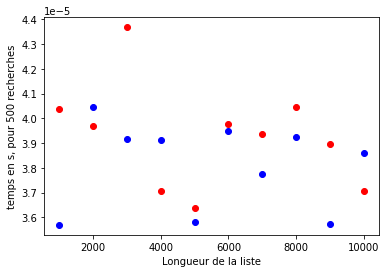

In [7]:
from matplotlib import pyplot as plt

# Faire une boucle sur les valeurs de n pour calculer les temps d'exécution sur chacun des 2 algorithme
# La liste abscisse contiendra les valeurs de n, les listes ordonnee1 et ordonnée2 contiendront les temps
# d'exécution des 2 algorihtmes. 
abscisse=[]
ordonnee1=[]
ordonnee2=[]
for N in range(1000,11000,1000): # la taille N du tableau varie de 1000 à 10 000 par pas de 1000
    abscisse.append(N) # N sera en abscisse
    L=[randint(0,10000) for k in range(N)] # on génère un tableau d'entiers aléatoire entre 0 et 10 000
    L.sort() # on trie la liste sur place
    x=L[-1]+1 # x est plus grand que la dernière valeur de la liste, il n'est donc pas dans la liste (pire cas)
    t1 = Timer("Recherche_occurence(L,x)", globals=globals()) # on crée un timer pour Recherche_occurence
    ordonnee1.append(min(t1.repeat(5,500))) # on ajoute à ordonnée 1 le temps minimum sur 5 essais de 500 recherches
    t2 = Timer("Recherche_dicho(L,x)", globals=globals()) # on crée un timer pour Recherche_dicho
    ordonnee2.append(min(t2.repeat(5,500))) # on ajoute à ordonnée 2 le temps minimum sur 5 essais de 500 recherches

# nom des axes    
plt.xlabel('Longueur de la liste')
plt.ylabel('temps en s, pour 500 recherches')
# definition des courbes
plt.scatter(abscisse,ordonnee2,color='red')
plt.scatter(abscisse,ordonnee1,color='blue')
#tracé du graphique
plt.show()

**Bonus :**

**Programmer le petit jeu suivant :**
> Le joueur a le choix soit de deviner le nombre, soit de laisser l'ordinateur le trouver.
>
> S'il choisi de deviner, le programme  tire au hasard un nombre entier compris entre 0 et 100 et à chaque proposition du joueur, il indique si le nombre à deviner est plus grand ou plus petit.
>
> S'il choisi de laisser l'ordinateur le trouver, il répond par oui ou par non aux questions posées par l'ordinateur.
>
>Dans tous les cas, le but du jeu est de trouver le plus vite possible le nombre choisi.

In [8]:
#Bonus

**Pour conclure**, signalons qu'en pratique, l'implémentation de la recherche dichotomique n'est pas aussi simple qu'elle en a l'air : voir [ici](https://en.wikipedia.org/wiki/Binary_search_algorithm#Implementation_issues) ou [là](https://professeurb.github.io/articles/dichoto/) pour plus de détails.